In [1]:
time_list=[]

(1)

image.png

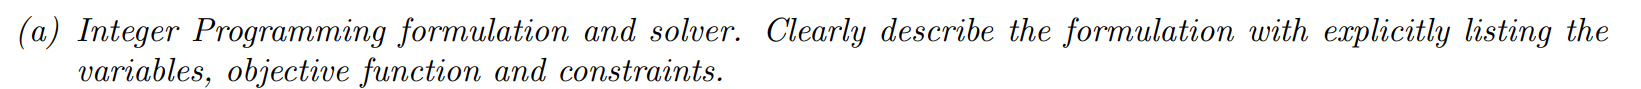

The Integer Programming (IP) formulation of the problem is as follows:

# (a)

 **Decision Variables:**
 Let $x_i$ be a binary decision variable where $x_i = 1$ if task $i$ is scheduled and $x_i = 0$ otherwise.

 **Objective Function:**
 The objective is to maximize the total value of the tasks scheduled.
 $\text{Maximize} \quad \sum_{i=1}^{20} \text{Value}_i \cdot x_i$

 **Constraints:**

 Each task can only be scheduled once.
 $\sum_{i=1}^{20} x_i \leq 20$

 The total time taken by the scheduled tasks should not exceed 40 hours.
 $\sum_{i=1}^{20} \text{Time}_i \cdot x_i \leq 40 \times 60$
 Formulation:

 $\text{Maximize} \quad 10x_1 + 25x_2 + 33x_3 + 53x_4 + 15x_5 + 70x_6 + 52x_7 + 45x_8 + 32x_9 + 30x_{10} + 20x_{11} + 5x_{12} + 17x_{13} + 50x_{14} + 37x_{15} + 18x_{16} + 71x_{17} + 35x_{18} + 60x_{19} + 90x_{20}$
 Subject to:

 $\begin{align*}
 & \sum_{i=1}^{20} x_i \leq 20 \\
 & \sum_{i=1}^{20} \text{Time}_i \cdot x_i \leq 40 \times 60 \\
 & x_i \in \{0, 1\} \quad \text{for} \quad i = 1, 2, \ldots, 20
 \end{align*}$

In [2]:
!pip install pulp

In [3]:
import time
import pulp

values = [10, 25, 33, 53, 15, 70, 52, 45, 32, 30, 20, 5, 17, 50, 37, 18, 71, 35, 60, 90]
times = [180, 180, 150, 150, 130, 210, 160, 175, 90, 120, 110, 60, 145, 180, 120, 120, 300, 300, 240, 500]

prob = pulp.LpProblem("TaskScheduling", pulp.LpMaximize)

tasks = range(1, 21)
x = pulp.LpVariable.dicts("Task", tasks, cat=pulp.LpBinary)

prob += pulp.lpSum([x[i] * values[i-1] for i in tasks])

prob += pulp.lpSum([x[i] for i in tasks]) <= 20
prob += pulp.lpSum([times[i-1] * x[i] for i in tasks]) <= 40 * 60

start_time = time.time()
prob.solve()
end_time = time.time()

print("Optimal Schedule:")
total_value = 0
for i in tasks:
    if x[i].value() == 1:
        total_value += values[i-1]
        print(f"Task {i}: Value={values[i-1]}, Time={times[i-1]}")

print("Total Value:", total_value)
print("Time taken:", end_time - start_time, "seconds")
time_list.append(end_time - start_time)

Optimal Schedule:
Task 3: Value=33, Time=150
Task 4: Value=53, Time=150
Task 6: Value=70, Time=210
Task 7: Value=52, Time=160
Task 8: Value=45, Time=175
Task 9: Value=32, Time=90
Task 10: Value=30, Time=120
Task 14: Value=50, Time=180
Task 15: Value=37, Time=120
Task 17: Value=71, Time=300
Task 19: Value=60, Time=240
Task 20: Value=90, Time=500
Total Value: 623
Time taken: 0.013057708740234375 seconds


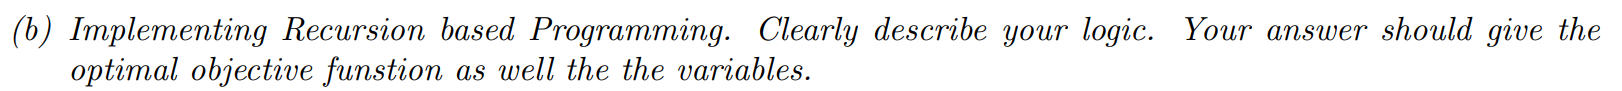

Recursion

#(b)

Here's the logic:

Define a recursive function maximize_value(tasks, current_task, current_value, current_time) that takes the list of tasks, the current task index, the current total value, and the current total time as arguments.

Base case:

If we have considered all tasks (current_task == len(tasks)), return the current total value and the list of tasks selected.
Recursive case:

For the current task, we have two options: either include it in the schedule or skip it.
If including the current task doesn't exceed the time constraint, recursively call the function with the next task and update the total value and time.
If skipping the current task, recursively call the function with the next task without updating the total value and time.
Compare the total values obtained from both options and return the maximum value and the corresponding task list.

Finally, call the recursive function with initial parameters (empty task list, current task index as 0, current value as 0, and current time as 0).

In [4]:
import time

def maximize_value(tasks, current_task, current_value, current_time, max_time, selected_tasks, max_value, max_selected_tasks):
    # Base case: All tasks are considered
    if current_task == len(tasks):
        if current_value > max_value[0]:
            max_value[0] = current_value
            max_selected_tasks.clear()
            max_selected_tasks.extend(selected_tasks)
        return

    # Recursive case:
    # Include current task if it doesn't exceed the time constraint
    if current_time + tasks[current_task][1] <= max_time:
        selected_tasks.append(tasks[current_task][0])
        maximize_value(tasks, current_task + 1, current_value + tasks[current_task][2],
                       current_time + tasks[current_task][1], max_time, selected_tasks, max_value, max_selected_tasks)
        selected_tasks.pop()  # Backtrack

    # Skip current task
    maximize_value(tasks, current_task + 1, current_value, current_time, max_time, selected_tasks, max_value, max_selected_tasks)

tasks = [
    (1, 180, 10), (2, 180, 25), (3, 150, 33), (4, 150, 53), (5, 130, 15), (6, 210, 70), (7, 160, 52), (8, 175, 45),
    (9, 90, 32), (10, 120, 30), (11, 110, 20), (12, 60, 5), (13, 145, 17), (14, 180, 50), (15, 120, 37), (16, 120, 18),
    (17, 300, 71), (18, 300, 35), (19, 240, 60), (20, 500, 90)
]

max_time = 40 * 60  # 40 hours in minutes
max_value = [0]  # Store the maximum value found
max_selected_tasks = []  # Store the selected tasks corresponding to maximum value

start_time = time.time()
maximize_value(tasks, 0, 0, 0, max_time, [], max_value, max_selected_tasks)
end_time = time.time()

# Print the optimal solution
print("Optimal Schedule:")
for task_id in max_selected_tasks:
    print(f"Task {task_id}")

print("Total Value:", max_value[0])
print("Execution Time:", end_time - start_time, "seconds")
time_list.append(end_time - start_time)

Optimal Schedule:
Task 3
Task 4
Task 6
Task 7
Task 8
Task 9
Task 10
Task 14
Task 15
Task 17
Task 19
Task 20
Total Value: 623
Execution Time: 0.7966196537017822 seconds


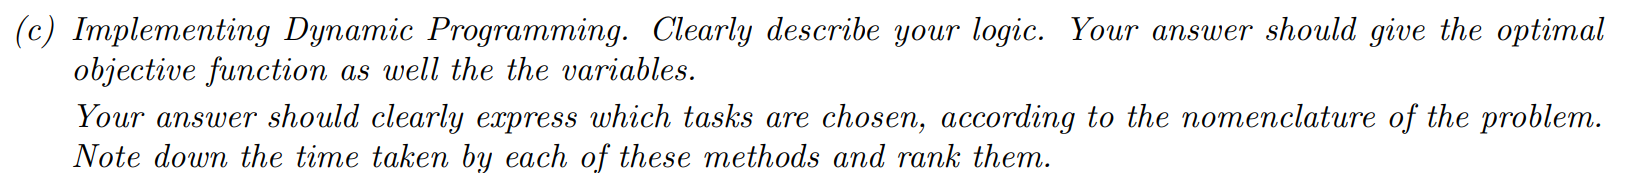

# (c)

Define Subproblems:
The subproblems involve considering subsets of tasks and finding the maximum total value for each subset that satisfies the time constraint.

Formulate Recurrence Relation:
We define a function $ DP(i, t) $, where $ i $ represents the index of the task we are considering, and $ t $ represents the remaining time available. The recurrence relation is:
$ DP(i, t) = \max\left(DP(i-1, t), DP(i-1, t - \text{Time}_i) + \text{Value}_i\right) $
where $ \text{Time}_i $ and $ \text{Value}_i $ represent the time and value of the $ i $th task, respectively.

Initialize DP Table:
Initialize a 2D array $ \text{dp}[i][t] $ with dimensions $ (n+1) \times (T+1)$, where $ n $ is the number of tasks and $ T $ is the maximum time available.

Fill DP Table:
Iterate through the tasks and available time, filling in the DP table using the recurrence relation.

Reconstruct Solution:
Once the DP table is filled, backtrack to find the tasks selected to achieve the maximum total value.


In [5]:
import time

def maximize_value(tasks, max_time):
    n = len(tasks)
    dp = [[0] * (max_time + 1) for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for t in range(1, max_time + 1):
            time_i, value_i = tasks[i - 1][1], tasks[i - 1][2]
            if time_i <= t:
                dp[i][t] = max(dp[i - 1][t], dp[i - 1][t - time_i] + value_i)
            else:
                dp[i][t] = dp[i - 1][t]

    # Reconstruct the solution
    selected_tasks = []
    i, t = n, max_time
    while i > 0 and t > 0:
        if dp[i][t] != dp[i - 1][t]:
            selected_tasks.append(tasks[i - 1][0])
            t -= tasks[i - 1][1]
        i -= 1

    return dp[n][max_time], selected_tasks

# Task data: (task_id, time_required, value)
tasks = [
    (1, 180, 10), (2, 180, 25), (3, 150, 33), (4, 150, 53), (5, 130, 15), (6, 210, 70), (7, 160, 52), (8, 175, 45),
    (9, 90, 32), (10, 120, 30), (11, 110, 20), (12, 60, 5), (13, 145, 17), (14, 180, 50), (15, 120, 37), (16, 120, 18),
    (17, 300, 71), (18, 300, 35), (19, 240, 60), (20, 500, 90)
]

max_time = 40 * 60  # 40 hours in minutes

# Timing the function execution
start_time = time.time()
total_value, selected_tasks = maximize_value(tasks, max_time)
end_time = time.time()

# Print the optimal solution
print("Optimal Schedule:")
for task_id in selected_tasks:
    print(f"Task {task_id}")

print("Total Value:", total_value)
print("Execution Time:", end_time - start_time, "seconds")
time_list.append(end_time - start_time)

Optimal Schedule:
Task 20
Task 19
Task 17
Task 15
Task 14
Task 10
Task 9
Task 8
Task 7
Task 6
Task 4
Task 3
Total Value: 623
Execution Time: 0.02977585792541504 seconds


In [6]:
time_list

[0.013057708740234375, 0.7966196537017822, 0.02977585792541504]

Ranking:

1)Integer Programming(a)

2)Dynamic Programming(c)

3)Recursion based Programming(b)

image.png

In [7]:
tasks = [
    (1, 10, 180),
    (2, 25, 180),
    (3, 33, 150),
    (4, 53, 150),
    (5, 15, 130),
    (6, 70, 210),
    (7, 52, 160),
    (8, 45, 175),
    (9, 32, 90),
    (10, 30, 120),
    (11, 20, 110),
    (12, 5, 60),
    (13, 17, 145),
    (14, 50, 180),
    (15, 37, 120),
    (16, 18, 120),
    (17, 71, 300),
    (18, 35, 300),
    (19, 60, 240),
    (20, 90, 500)
]

# Sort tasks by their value-to-time ratio in descending order
sorted_tasks = sorted(tasks, key=lambda x: x[1], reverse=True)

# Define available hours
available_hours = 40 * 60  # 40 hours * 60 minutes

# Initialize variables
total_value = 0
remaining_hours = available_hours

# Iterate over sorted tasks and select tasks until the time constraint is fulfilled
for task_number, value, time in sorted_tasks:
    if time <= remaining_hours:
        total_value += value
        remaining_hours -= time
        print('Task',task_number)
    else:
        break  # Stop the loop if adding the next task exceeds the time constraint
print("Total value of selected tasks:", total_value)

Task 20
Task 17
Task 6
Task 19
Task 4
Task 7
Task 14
Task 8
Task 15
Task 18
Total value of selected tasks: 563


No the optimal solution remain not same as 1

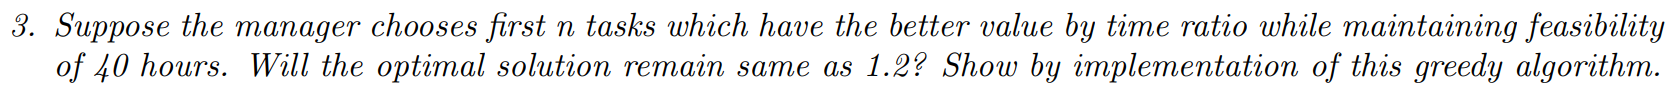

In [8]:
tasks = [
    (1, 10, 180),
    (2, 25, 180),
    (3, 33, 150),
    (4, 53, 150),
    (5, 15, 130),
    (6, 70, 210),
    (7, 52, 160),
    (8, 45, 175),
    (9, 32, 90),
    (10, 30, 120),
    (11, 20, 110),
    (12, 5, 60),
    (13, 17, 145),
    (14, 50, 180),
    (15, 37, 120),
    (16, 18, 120),
    (17, 71, 300),
    (18, 35, 300),
    (19, 60, 240),
    (20, 90, 500)
]

# Calculate value-to-time ratio for each task
tasks_with_ratio = [(task[0], task[1], task[2], task[1] / task[2]) for task in tasks]

# Sort tasks by their value-to-time ratio in descending order
sorted_tasks = sorted(tasks_with_ratio, key=lambda x: x[3], reverse=True)

# Define available hours
available_hours = 40 * 60  # 40 hours * 60 minutes

# Initialize variables
total_value = 0
total_time = 0
selected_tasks = []

# Iterate over sorted tasks and select tasks while considering the time constraint
for task_number, value, time, ratio in sorted_tasks:
    if total_time + time <= available_hours:
        total_value += value
        total_time += time
        selected_tasks.append((task_number, value, time))
    else:
        break

print("Total value of selected tasks:", total_value)
print("Selected tasks:", selected_tasks)

Total value of selected tasks: 553
Selected tasks: [(9, 32, 90), (4, 53, 150), (6, 70, 210), (7, 52, 160), (15, 37, 120), (14, 50, 180), (8, 45, 175), (10, 30, 120), (19, 60, 240), (17, 71, 300), (3, 33, 150), (11, 20, 110)]


No the optimal solution remain not same as 1

(4)

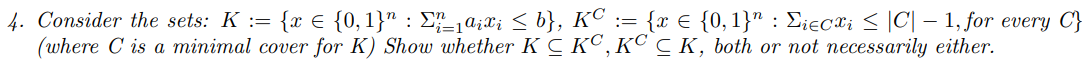

For a given $a_i$ and $b$, define two sets:

1. $K = \{x_i \in \{0,1\}^n : \sum_{i=1}^n a_i x_i \leq b\}$
2. $K^C = \{x_i \in \{0,1\}^n : \sum_{i \in C}^n x_i \leq |C| - 1, \forall C \}$

Where $C$ represents a minimal cover for $K$.
- $K$ represents the set of binary vectors $x$ such that the weighted sum of $x$ with coefficients $a_i$ does not exceed $b$.
- $K^C$ represents the set of binary vectors $x$ such that the sum of components indexed by $C$ does not exceed $|C| - 1$, for all minimal covers $C$ of $K$.


1. Case 1: $K \subseteq K^C$ is not true because the minimal set cover is one of the sets in $K$ for a given $a_i$ and $b$.
2. Case 2: $K^C \subseteq K$ is true because any $x$ in $K^C$ satisfies the condition $\sum_{i=1}^n a_i x_i \leq b$ in $K$ for a given $a_i$ and $b$.

Therefore, $K \not\subseteq K^C$ and $K^C \not\subseteq K$, so both cases are not valid. This demonstrates that $K$ and $K^C$ are not necessarily equivalent.
